<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Deep%20Learning/from%20directory/Intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
#!kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
!ls

a-rfr-ed.jpg  cell-images-for-detecting-malaria.zip  readme.md	seg_train
b	      DB1_B				     real	SOCOFing
big.file      intel-image-classification.zip	     seg_pred	train
cell_images   kaggle.json			     seg_test


In [ ]:
#!unzip '/content/gdrive/My Drive/kaggle/intel-image-classification.zip'

In [ ]:
#import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
train_dir = '/content/gdrive/My Drive/kaggle/seg_train/seg_train'
test_dir = '/content/gdrive/My Drive/kaggle/seg_test/seg_test'

In [ ]:
datagen = dict(rescale = 1./255, validation_split = 0.2)

In [ ]:
train_datagen = ImageDataGenerator(**datagen, horizontal_flip = True,)
valid_datagen = ImageDataGenerator(**datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle = True,
    seed = 42,
    target_size = (150,150),
    subset = 'training'
)

Found 11230 images belonging to 6 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    shuffle = True,
    seed = 42,
    target_size = (150,150),
    subset = 'validation'
)

Found 2804 images belonging to 6 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = False,
    target_size = (150,150)
)

Found 3000 images belonging to 6 classes.


**MODEL**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import layers
from keras import optimizers
from keras import  Sequential

In [ ]:
model = Sequential([
                    Conv2D(32, 3, padding='same',activation='relu',kernel_initializer='he_uniform', input_shape = [150, 150, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same',kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(6, activation = 'softmax'),
                    ])

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
steps = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_generator, epochs = 20, steps_per_epoch= steps, validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
351/351 [==============================] - 4617s 13s/step - loss: 1.1512 - accuracy: 0.5562 - val_loss: 1.0414 - val_accuracy: 0.6177
Epoch 2/20
351/351 [==============================] - 32s 92ms/step - loss: 0.8703 - accuracy: 0.6710 - val_loss: 1.0839 - val_accuracy: 0.6316
Epoch 3/20
351/351 [==============================] - 32s 91ms/step - loss: 0.7560 - accuracy: 0.7191 - val_loss: 0.7224 - val_accuracy: 0.7389
Epoch 4/20
351/351 [==============================] - 32s 91ms/step - loss: 0.6642 - accuracy: 0.7569 - val_loss: 0.3553 - val_accuracy: 0.7422
Epoch 5/20
351/351 [==============================] - 31s 89ms/step - loss: 0.6056 - accuracy: 0.7832 - val_loss: 0.4154 - val_accuracy: 0.7885
Epoch 6/20
351/351 [==============================] - 31s 88ms/step - loss: 0.5566 - accuracy: 0.7980 - val_loss: 0.6064 - val_accuracy: 0.7814
Epoch 7/20
351/351 [==============================] - 30s 86ms/step - loss: 0.5224 - accuracy: 0.8142 - val_loss: 0.6837 - val_accuracy

(0.0, 1.0)

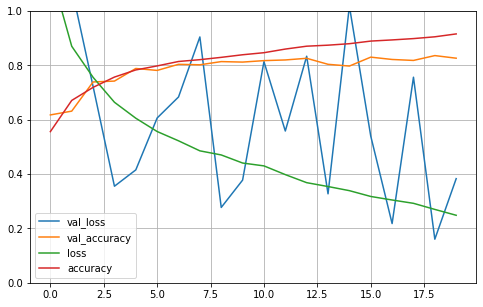

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)       